In [3]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [6]:
g = 9.8
v_t = 30.
C_D = 1/40
C_L = 1

v0 = v_t
theta0 = 0
x0 = 0
y0 = 1000

In [7]:
def f(u):
    v, theta, x, y = u
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                        -g*cos(theta)/v + g/v_t**2*v,
                        v*cos(theta),
                        v*sin(theta)])

In [8]:
def euler_step(u,f,dt):
    return u + dt*f(u)

In [9]:
T = 100
dt = 0.1
N = int(T/dt) + 1
t = numpy.linspace(0,T,N)

u= numpy.empty((N,4))
u[0] = numpy.array([v0,theta0,x0,y0])

for n in range(N-1):
    u[n+1] = euler_step(u[n],f,dt)

In [45]:
u.shape

(100001, 4)

In [15]:
x = u[:,2]
y = u[:,3]

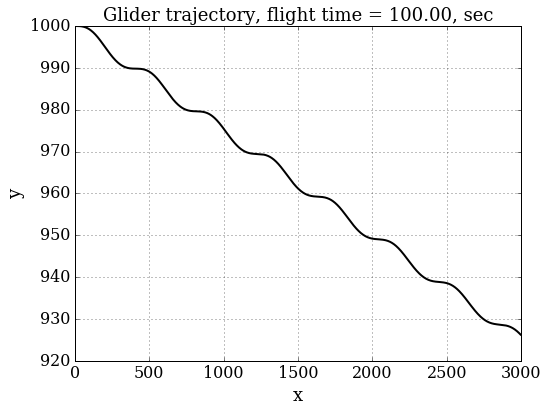

In [19]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x',fontsize = 18)
pyplot.ylabel(r'y',fontsize = 18)
pyplot.title('Glider trajectory, flight time = %.2f, sec' % T, fontsize = 18)
pyplot.plot(x,y,'k-',lw=2);

In [22]:
3000/75

40.0

In [23]:
dt_values = numpy.array([0.1,0.05,0.01,0.005,0.001])
u_values = numpy.empty_like(dt_values,dtype=numpy.ndarray)

for i,dt in enumerate(dt_values):
    N = int(T/dt) + 1
    t = numpy.linspace(0,T,N)

    u= numpy.empty((N,4))
    u[0] = numpy.array([v0,theta0,x0,y0])

    for n in range(N-1):
        u[n+1] = euler_step(u[n],f,dt)
    
    u_values[i] = u

In [25]:
def get_diffgrid(u_current, u_fine, dt):
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
    
    grid_size_ratio = ceil(N_fine/N_current)
    
    diffgrid = dt* numpy.sum(numpy.abs(\
                u_current[:,2] - u_fine[::grid_size_ratio,2]))
    return diffgrid

In [40]:
diffgrid = numpy.empty_like(dt_values)

for i,dt in enumerate(dt_values):
    print('dt = {}'.format(dt))
    
    diffgrid[i] = get_diffgrid(u_values[i],u_values[-1],dt)
    

dt = 0.1
dt = 0.05
dt = 0.01
dt = 0.005
dt = 0.001


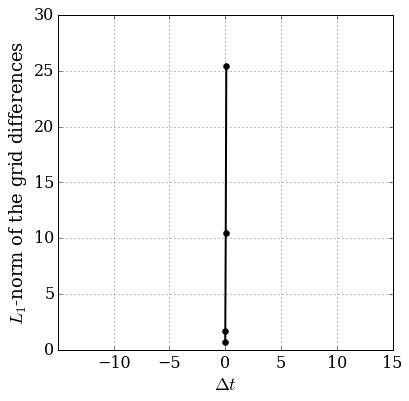

In [44]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$',fontsize = 18)
pyplot.ylabel('$L_1$-norm of the grid differences',fontsize = 18)
pyplot.axis('equal')
#pyplot.loglog(dt_values[:-1],diffgrid[:-1],color = 'k', ls='-',lw=2, marker = 'o');
pyplot.plot(dt_values[:-1],diffgrid[:-1],color = 'k', ls='-',lw=2, marker = 'o');